## **Objective**  
In this episode we are given the task of predicting the price of backpacks given various attributes.  
Submissions are scored on the root mean squared error.  

RMSE is defined as:

$$
\textrm{RMSE} =  \left( \frac{1}{N} \sum_{i=1}^{N} (y_i - \widehat{y}_i)^2 \right)^{\frac{1}{2}}
$$

## **Data**  
The dataset for this competition is generated from a deep learning model trained on the [Student Bag Pric Preditions Dateset](https://www.kaggle.com/datasets/souradippal/student-bag-price-prediction-dataset/data)


In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from catboost import CatBoostRegressor
import optuna

print('Libaires imported')

Libaires imported


In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s5e2/train.csv')
df_train_ex = pd.read_csv('/kaggle/input/playground-series-s5e2/training_extra.csv')
df_original = pd.read_csv('/kaggle/input/student-bag-price-prediction-dataset/Noisy_Student_Bag_Price_Prediction_Dataset.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s5e2/test.csv')
df_sub = pd.read_csv('/kaggle/input/playground-series-s5e2/sample_submission.csv')
print('Data imported')

Data imported


### **Initial Observations**  


In [3]:
df_test

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953
...,...,...,...,...,...,...,...,...,...,...
199995,499995,Adidas,Canvas,Large,2.0,Yes,No,Messenger,Red,7.383498
199996,499996,Nike,Polyester,Small,9.0,No,Yes,Messenger,Pink,6.058394
199997,499997,Jansport,Nylon,Small,9.0,No,Yes,Tote,Green,26.890163
199998,499998,Puma,Nylon,Large,10.0,Yes,No,Tote,Gray,25.769153


In [4]:
df_train

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312
...,...,...,...,...,...,...,...,...,...,...,...
299995,299995,Adidas,Leather,Small,9.0,No,No,Tote,Blue,12.730812,129.99749
299996,299996,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182,19.85819
299997,299997,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250,111.41364
299998,299998,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738,115.89080


In [5]:
df_train_ex

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,500000,Under Armour,Canvas,Small,10.0,Yes,Yes,Tote,Blue,23.882052,114.11068
1,500001,Puma,Polyester,Small,4.0,No,Yes,Backpack,Green,11.869095,129.74972
2,500002,Jansport,Polyester,Small,8.0,Yes,Yes,Tote,Red,8.092302,21.37370
3,500003,Nike,Nylon,Large,7.0,No,No,Messenger,Pink,7.719581,48.09209
4,500004,Nike,Leather,Large,9.0,No,Yes,Tote,Green,22.741826,77.32461
...,...,...,...,...,...,...,...,...,...,...,...
3694313,4194313,Nike,Canvas,NaN,3.0,Yes,Yes,Messenger,Blue,28.098120,104.74460
3694314,4194314,Puma,Leather,Small,10.0,Yes,Yes,Tote,Blue,17.379531,122.39043
3694315,4194315,Jansport,Canvas,Large,10.0,No,No,Backpack,Red,17.037708,148.18470
3694316,4194316,Puma,Canvas,NaN,2.0,No,No,Backpack,Gray,28.783339,22.32269


In [6]:
df_original

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,Jansport,Nylon,Small,2.0,No,Yes,Backpack,Green,13.340058,143.445135
1,Under Armour,Nylon,Large,4.0,Yes,Yes,Tote,Pink,5.918030,72.086319
2,Nike,Nylon,Large,NaN,No,Yes,Messenger,Red,24.088386,29.699631
3,Nike,Nylon,Small,1.0,Yes,No,Messenger,Pink,5.000000,27.181990
4,Under Armour,Leather,Small,8.0,Yes,No,NaN,Black,11.258172,71.953236
...,...,...,...,...,...,...,...,...,...,...
52495,Jansport,Nylon,Medium,3.0,No,Yes,Messenger,Gray,19.774853,61.140497
52496,Jansport,NaN,Small,8.0,No,Yes,Messenger,Red,29.822417,47.140186
52497,Jansport,Polyester,Large,10.0,No,Yes,Messenger,Red,13.269034,56.184138
52498,Adidas,Canvas,Large,5.0,No,No,Messenger,Green,28.132229,112.036966


In [7]:
df_train_combined = pd.concat([df_train, df_train_ex, df_original], ignore_index=True)
df_train_combined["id"] = df_train_combined.index

In [8]:
df_train_combined

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.158750
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.880560
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.173200
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.607930
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.023120
...,...,...,...,...,...,...,...,...,...,...,...
4046813,4046813,Jansport,Nylon,Medium,3.0,No,Yes,Messenger,Gray,19.774853,61.140497
4046814,4046814,Jansport,NaN,Small,8.0,No,Yes,Messenger,Red,29.822417,47.140186
4046815,4046815,Jansport,Polyester,Large,10.0,No,Yes,Messenger,Red,13.269034,56.184138
4046816,4046816,Adidas,Canvas,Large,5.0,No,No,Messenger,Green,28.132229,112.036966


In [9]:
df_train = df_train_combined

In [10]:
train_duplicates = df_train.duplicated().sum()
test_duplicates = df_test.duplicated().sum()

print(f"Number of duplicate rows in df_train: {train_duplicates}")
print(f"Number of duplicate rows in df_test: {test_duplicates}")

Number of duplicate rows in df_train: 0
Number of duplicate rows in df_test: 0


### **Summary of Datasets**

In [11]:
missing_values_train = pd.DataFrame({'Feature': df_train.columns,
                              '[TRAIN] No. of Missing Values': df_train.isnull().sum().values,
                              '[TRAIN] % of Missing Values': ((df_train.isnull().sum().values)/len(df_train)*100)})

missing_values_test = pd.DataFrame({'Feature': df_test.columns,
                             '[TEST] No.of Missing Values': df_test.isnull().sum().values,
                             '[TEST] % of Missing Values': ((df_test.isnull().sum().values)/len(df_test)*100)})

unique_values = pd.DataFrame({'Feature': df_train.columns,
                              'No. of Unique Values[FROM TRAIN]': df_train.nunique().values})

feature_types = pd.DataFrame({'Feature': df_train.columns,
                              'DataType': df_train.dtypes})

df_summary = pd.merge(missing_values_train, missing_values_test, on='Feature', how='left')
df_summary = pd.merge(df_summary, unique_values, on='Feature', how='left')
df_summary = pd.merge(df_summary, feature_types, on='Feature', how='left')

df_summary

,Feature,[TRAIN] No. of Missing Values,[TRAIN] % of Missing Values,[TEST] No.of Missing Values,[TEST] % of Missing Values,No. of Unique Values[FROM TRAIN],DataType
0,id,0,0.000000,0.0,0.0000,4046818,int64
1,Brand,129383,3.197154,6227.0,3.1135,5,object
2,Material,113587,2.806823,5613.0,2.8065,4,object
3,Size,90410,2.234101,4381.0,2.1905,3,object
4,Compartments,2625,0.064866,0.0,0.0000,10,float64
5,Laptop Compartment,101158,2.499692,4962.0,2.4810,2,object
6,Waterproof,96949,2.395685,4811.0,2.4055,2,object
7,Style,106805,2.639234,5153.0,2.5765,3,object
8,Color,136242,3.366645,6785.0,3.3925,6,object
9,Weight Capacity (kg),4433,0.109543,77.0,0.0385,1924579,float64


## **Dataset Observations**

### **Shape**
Training Data: 3,994,318rows × 11 columns  
Test Data: 200,000 rows × 10 columns

### **Missing Values**
Several features contain missing values in both the training and test sets:  

**Training set**
- Brand: ~3.20%
- Material:  ~2.80%
- Size: ~2.23%
- Compartments: ~0.06%
- Laptop Compartment: ~2.50%
- Waterproof: ~2.40%
- Style: ~2.64%
- Color: ~3.37%
- Weight Capacity (kg): ~0.11%
- Price: ~0.06%%

**Test set**
- Brand: ~3.11%
- Material: ~2.81%
- Size: ~2.19%
- Laptop Compartment: ~2.48%
- Waterproof: ~2.41%
- Style: ~2.58%
- Color: ~3.39%
- Weight Capacity (kg): ~0.04%


### **Feature Breakdown**

- **ID:** A unique identifier for each backpack.
- **Brand, Material, Size, Style:** Categorical variables.
- **Compartments:** Numeric, range from 1 to 10.
- **Laptop Compartment & Waterproof:** Binary categorical.
- **Color:** 6 unique values, with missing data.
- **Weight Capacity (kg):** Numerical.
- **Price:** The target variable in the training set.

## **EDA**

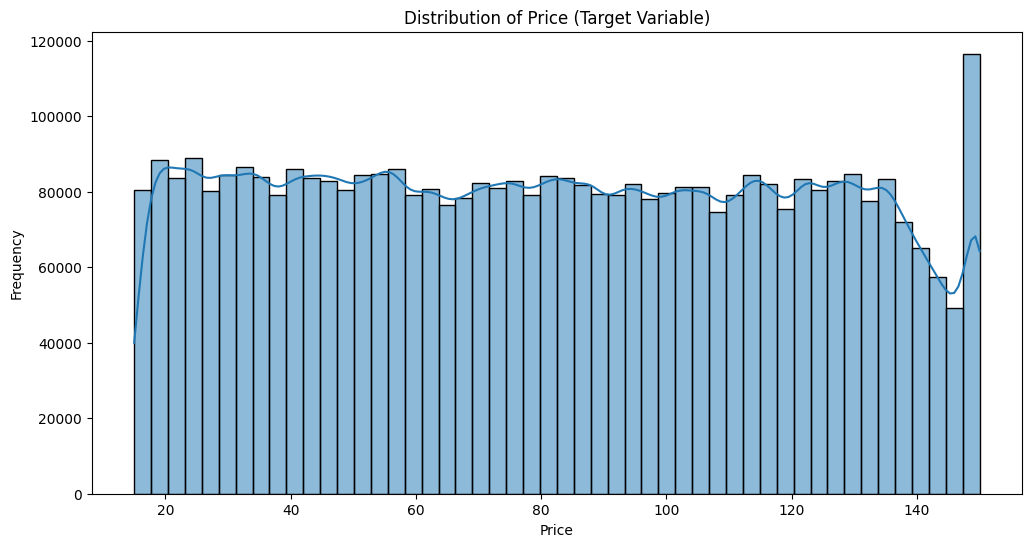

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(df_train["Price"], bins=50, kde=True)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Price (Target Variable)")
plt.show()

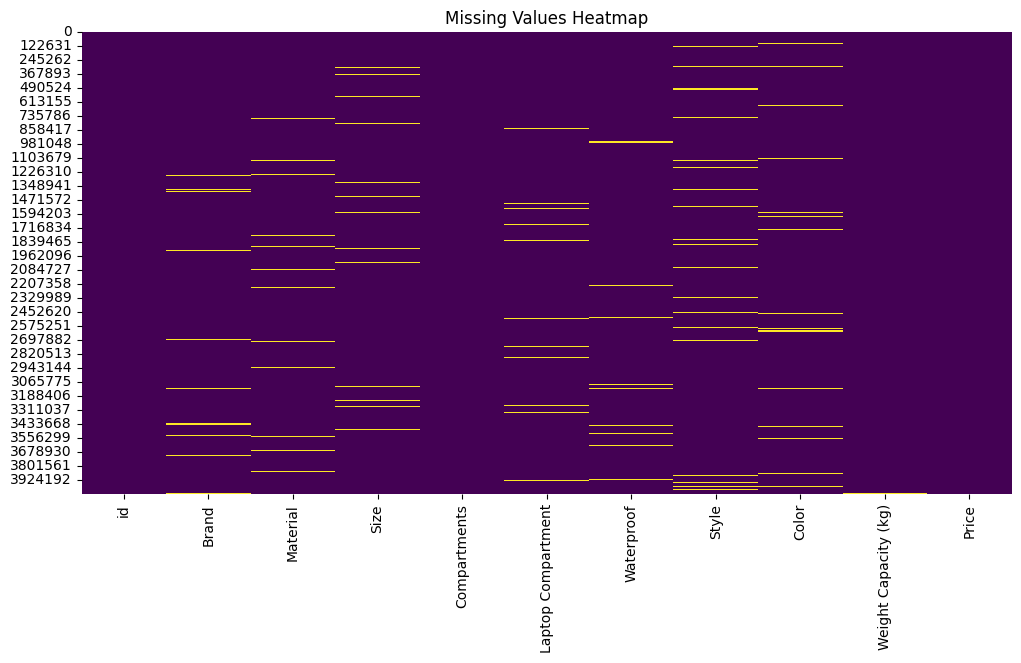

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_train.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

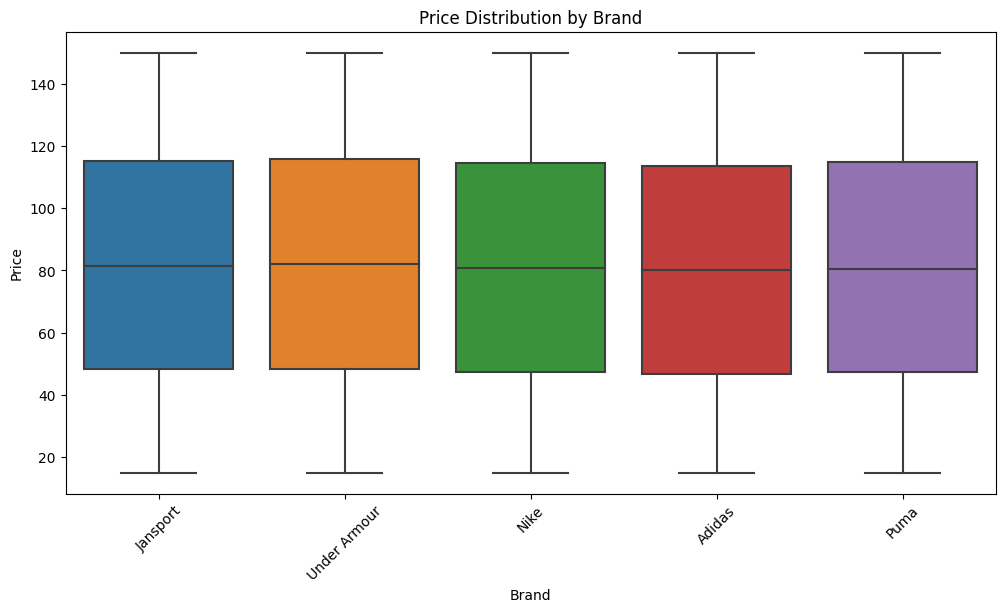

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Brand", y="Price", data=df_train)
plt.title("Price Distribution by Brand")
plt.xticks(rotation=45)
plt.show()

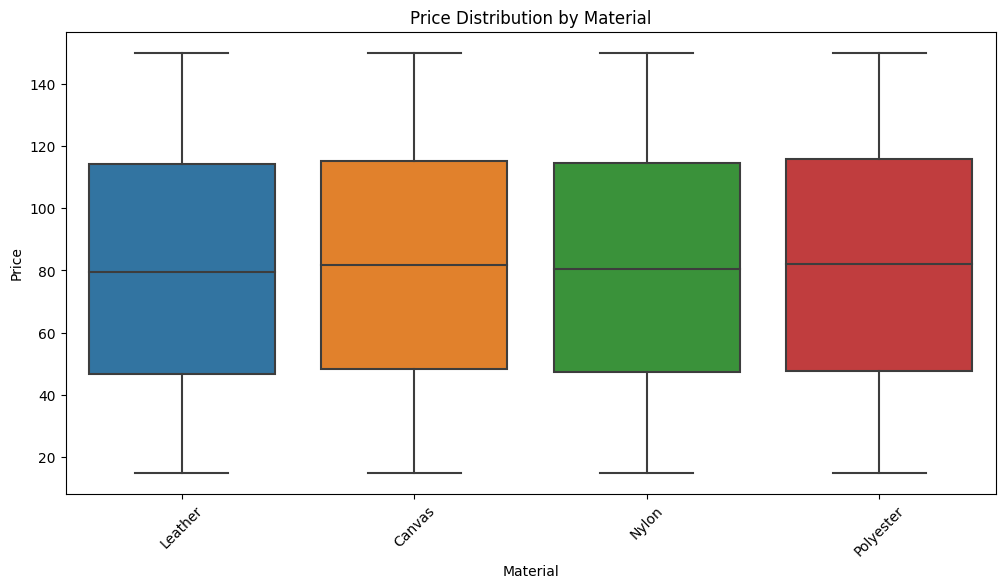

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Material", y="Price", data=df_train)
plt.title("Price Distribution by Material")
plt.xticks(rotation=45)
plt.show()

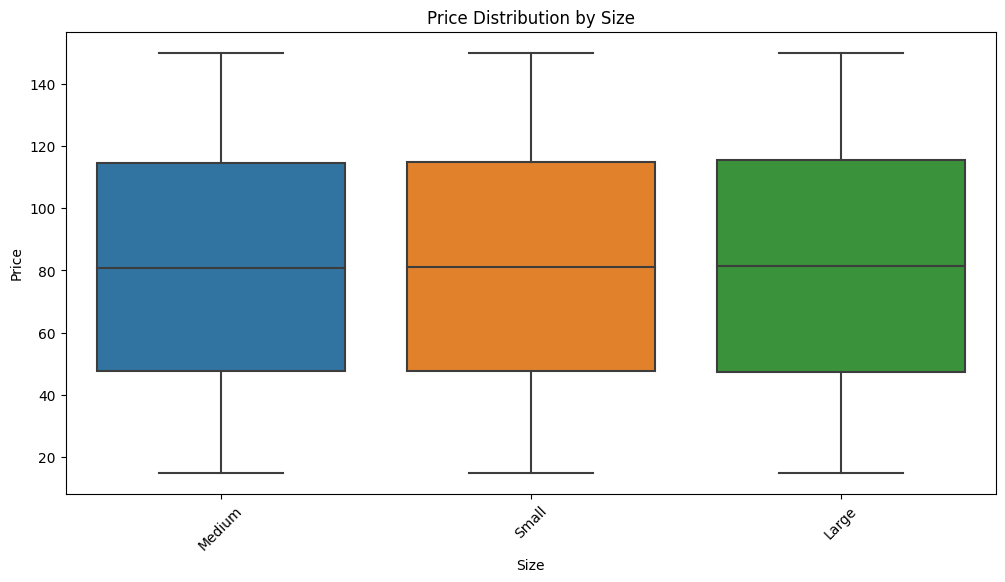

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Size", y="Price", data=df_train)
plt.title("Price Distribution by Size")
plt.xticks(rotation=45)
plt.show()

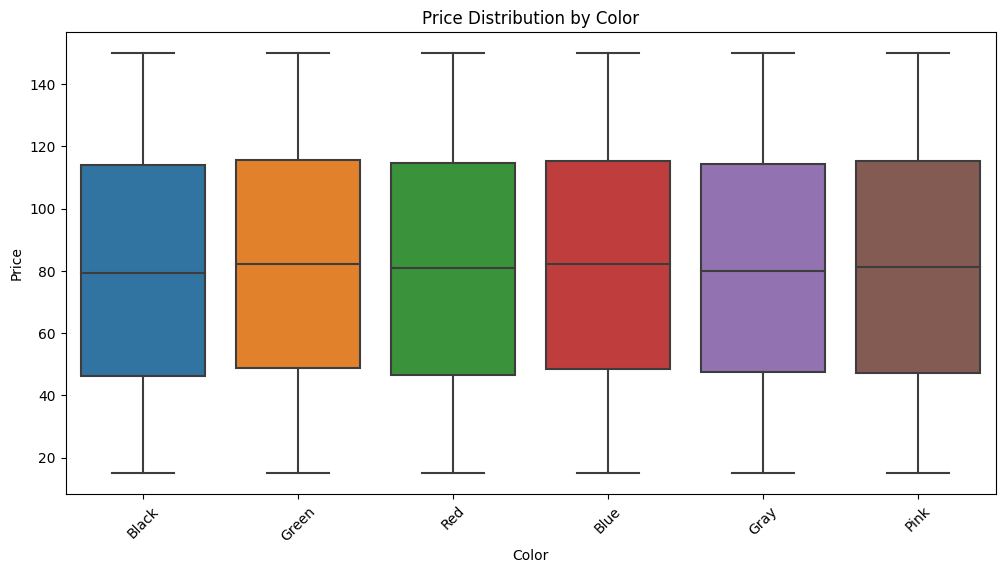

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Color", y="Price", data=df_train)
plt.title("Price Distribution by Color")
plt.xticks(rotation=45)
plt.show()

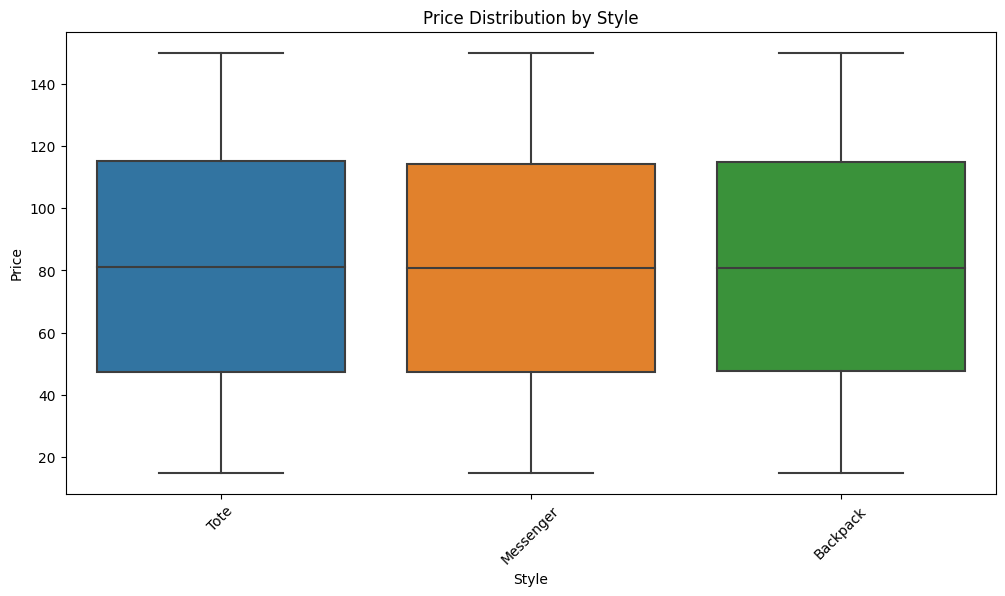

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Style", y="Price", data=df_train)
plt.title("Price Distribution by Style")
plt.xticks(rotation=45)
plt.show()

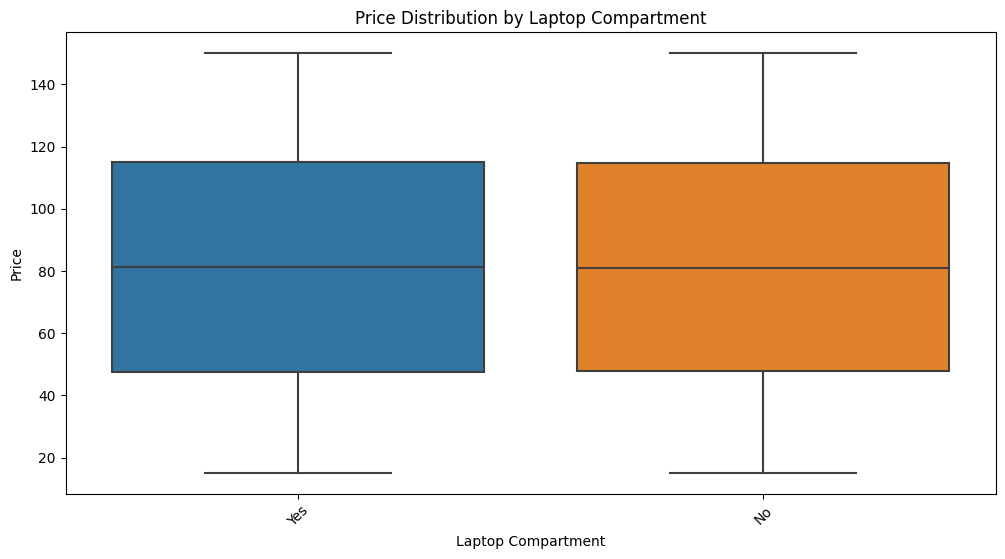

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Laptop Compartment", y="Price", data=df_train)
plt.title("Price Distribution by Laptop Compartment")
plt.xticks(rotation=45)
plt.show()

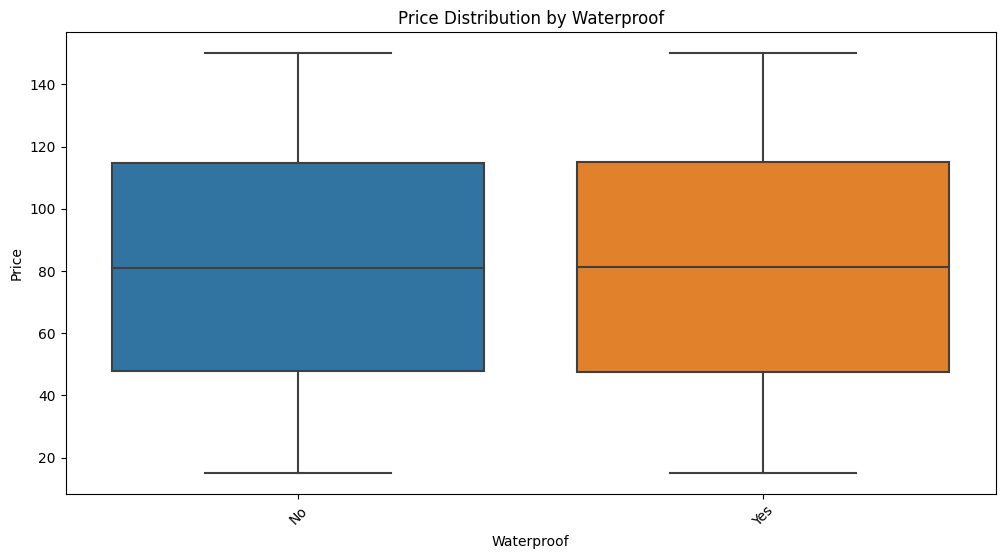

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Waterproof", y="Price", data=df_train)
plt.title("Price Distribution by Waterproof")
plt.xticks(rotation=45)
plt.show()

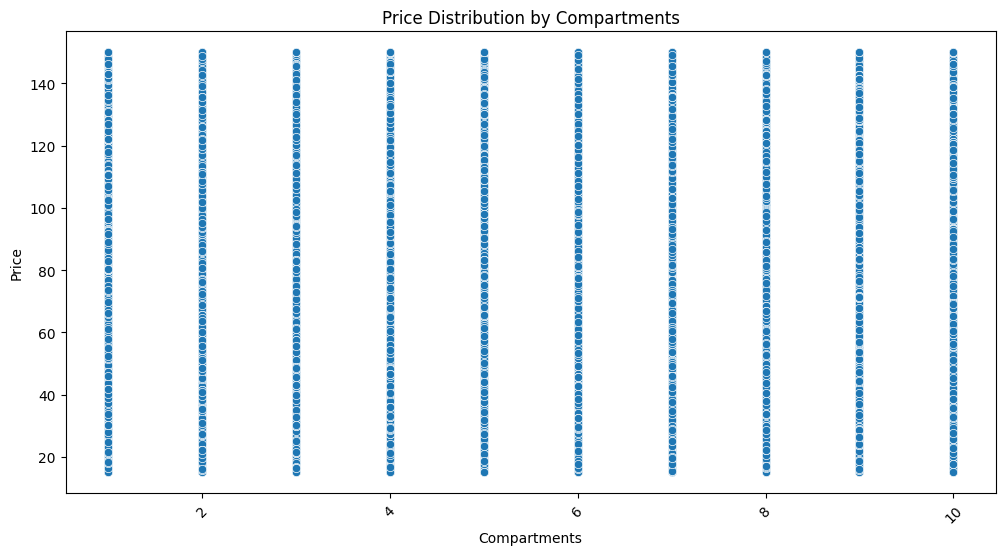

In [21]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Compartments", y="Price", data=df_train)
plt.title("Price Distribution by Compartments")
plt.xticks(rotation=45)
plt.show()

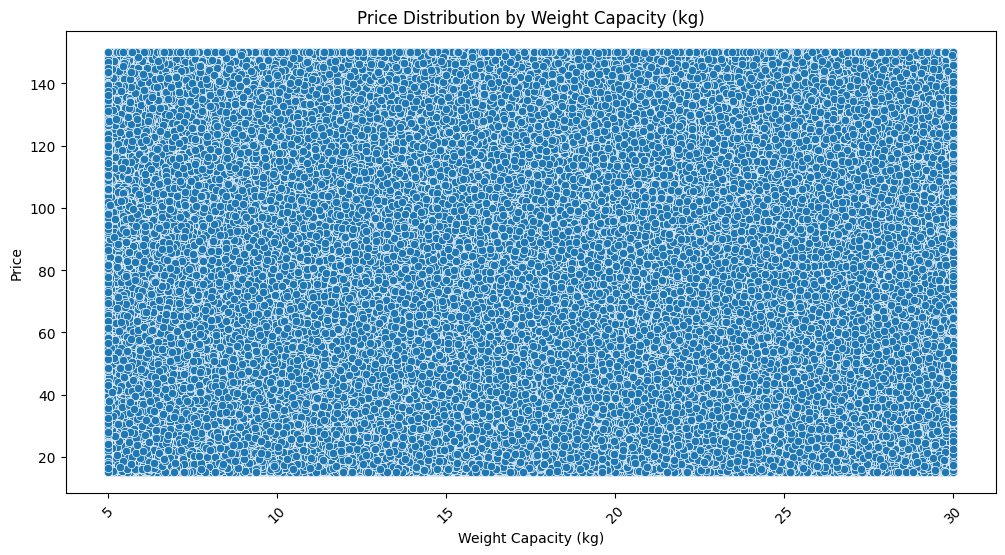

In [22]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Weight Capacity (kg)", y="Price", data=df_train)
plt.title("Price Distribution by Weight Capacity (kg)")
plt.xticks(rotation=45)
plt.show()

## **Data Imputation**

**Brand, Material, Size, Laptop Compartment, Waterproof, Style, Color**
Due to the small catagorical types and little to interpret from the plots from the EDA the best approach for the missing values would be to use mode imputation

**Weight Capacity (kg), Price**
Here I will use the median value for the imputation since we are working with a continuous numerical variable.

In [23]:
categorical_features = ["Brand", "Material", "Size", "Compartments", "Laptop Compartment", "Waterproof", "Style", "Color"]
numerical_features = ["Weight Capacity (kg)", "Price"]
numerical_features_test = ["Weight Capacity (kg)"]

for col in categorical_features:
    df_train[col].fillna(df_train[col].mode()[0], inplace=True)
    df_test[col].fillna(df_test[col].mode()[0], inplace=True)

for col in numerical_features:
    df_train[col].fillna(df_train[col].median(), inplace=True)
for col in numerical_features_test:
    df_test[col].fillna(df_test[col].median(), inplace=True)

## **Encoding Categorical Features**

In [24]:
# One-Hot Encoding for categorical variables
one_hot_features = ["Brand", "Material", "Size", "Style", "Color"]
df_train = pd.get_dummies(df_train, columns=one_hot_features)
df_test = pd.get_dummies(df_test, columns=one_hot_features)


# Label Encoding for binary variables
binary_features = ["Laptop Compartment", "Waterproof"]
for col in binary_features:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    
for col in binary_features:
    le = LabelEncoder()
    df_test[col] = le.fit_transform(df_test[col])

## **Baseline Model - Linear Regression**

In [25]:
X = df_train.drop(columns=["Price", "id"])
y = df_train["Price"]


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("Baseline RMSE:", rmse)

Baseline RMSE: 38.91994437779183


## **LightGBM Model**

In [26]:
X = df_train.drop(columns=["Price", "id"])
y = df_train["Price"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

lgb_model = lgb.LGBMRegressor(
    n_estimators=1000, 
    learning_rate=0.05, 
    max_depth=10, 
    num_leaves=31
)
lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric="rmse",
    callbacks=[lgb.early_stopping(100)]
)

y_pred = lgb_model.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("LightGBM RMSE:", rmse)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 3237454, number of used features: 25
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.364195
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[521]	valid_0's rmse: 38.8993	valid_0's l2: 1513.16
LightGBM RMSE: 38.89930904032942


## **XGBoost Model**

In [27]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

xgb_params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.05,
    "max_depth": 10,
    "n_estimators": 1000,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42
}

xgb_model = xgb.train(
    xgb_params, 
    dtrain, 
    evals=[(dvalid, "valid")], 
    early_stopping_rounds=50, 
    verbose_eval=100
)

y_pred_xgb = xgb_model.predict(dvalid)

rmse_xgb = np.sqrt(mean_squared_error(y_valid, y_pred_xgb))
print("XGBoost RMSE:", rmse_xgb)

[0]	valid-rmse:38.93612
[9]	valid-rmse:38.92140
XGBoost RMSE: 38.92140469308631


## **CatBoost Model**

In [28]:
cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=10,
    loss_function="RMSE",
    verbose=100,
    early_stopping_rounds=50
)

cat_model.fit(X_train, y_train, eval_set=(X_valid, y_valid))

y_pred_cat = cat_model.predict(X_valid)

rmse_cat = np.sqrt(mean_squared_error(y_valid, y_pred_cat))
print("CatBoost RMSE:", rmse_cat)

0:	learn: 38.9240582	test: 38.9367536	best: 38.9367536 (0)	total: 487ms	remaining: 8m 6s
100:	learn: 38.8729340	test: 38.9067080	best: 38.9067080 (100)	total: 38.4s	remaining: 5m 41s
200:	learn: 38.8469867	test: 38.9058638	best: 38.9054032 (182)	total: 1m 15s	remaining: 5m 1s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 38.90540324
bestIteration = 182

Shrink model to first 183 iterations.
CatBoost RMSE: 38.90540324359938


## **Model Performance Comparison**

In [29]:
print(f"LightGBM RMSE: {rmse}")
print(f"XGBoost RMSE: {rmse_xgb}")
print(f"CatBoost RMSE: {rmse_cat}")

LightGBM RMSE: 38.89930904032942
XGBoost RMSE: 38.92140469308631
CatBoost RMSE: 38.90540324359938


## **Hyperparameter Tuning for LightGMB Model**

In [ ]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 1000, 5000),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.005, 0.05),
        "max_depth": trial.suggest_int("max_depth", 5, 15),
        "num_leaves": trial.suggest_int("num_leaves", 20, 80),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 10, 50),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
        "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-3, 10.0),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10.0),
    }

    # Train LightGBM with suggested hyperparameters
    model = lgb.LGBMRegressor(**params)
    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric="rmse",
        callbacks=[lgb.early_stopping(100)],
        verbose=0
    )

    y_pred = model.predict(X_valid)
    return np.sqrt(mean_squared_error(y_valid, y_pred))

# Optuna optimization (50 trials)
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Best Parameters Found:", study.best_params)

## **Submission File**

In [32]:
X_test = df_test.drop(columns=["id"])
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

y_test_pred = lgb_model.predict(X_test)

submission = pd.DataFrame({
    "id": df_test["id"],
    "Price": y_test_pred
})

submission.to_csv("submission.csv", index=False)
print("Submission File Saved: submission.csv")

Submission File Saved: submission.csv
